In [1]:
from util.io import load_reference_fccs

fcc_Shestov = load_reference_fccs('../../data/fcc/ref_fcc_shestov.txt')
fcc_Komkova = load_reference_fccs('../../data/fcc/ref_fccs_komkova.txt')

fcc_Komkova.drop(columns=['Growth'], inplace=True)


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fcc_difference(fcc1, fcc2, effect_short_name: str,  causes: list[str]):
    plt.figure(figsize=(8, 2.5), dpi=600)
    plt.grid(axis='y')

    step = 2.5
    x = np.arange(start=0, stop=step * len(causes), step=step)
    ticks = list(causes)
    width = 0.9
    offset = 0.02

    plt.xticks(x, ticks, rotation=55, ha='right')

    plt.bar(x - width / 2 - offset / 2, height=fcc1.loc[effect_short_name, causes], width=width,
            label="Shestov-derived model", zorder=3)
    plt.bar(x + width / 2 + offset / 2, fcc2.loc[effect_short_name, causes], width=width,
            zorder=3,
            label="GEM-embedded model")

    plt.ylabel('FCCs for {name}'.format(name=effect_short_name))
    plt.legend(loc="upper left")

    image_path = '../../out/FCC_diff_' + effect_short_name + '.png'
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)

    plt.show()



## Fig. 6 Flux Control Coefficients on HK


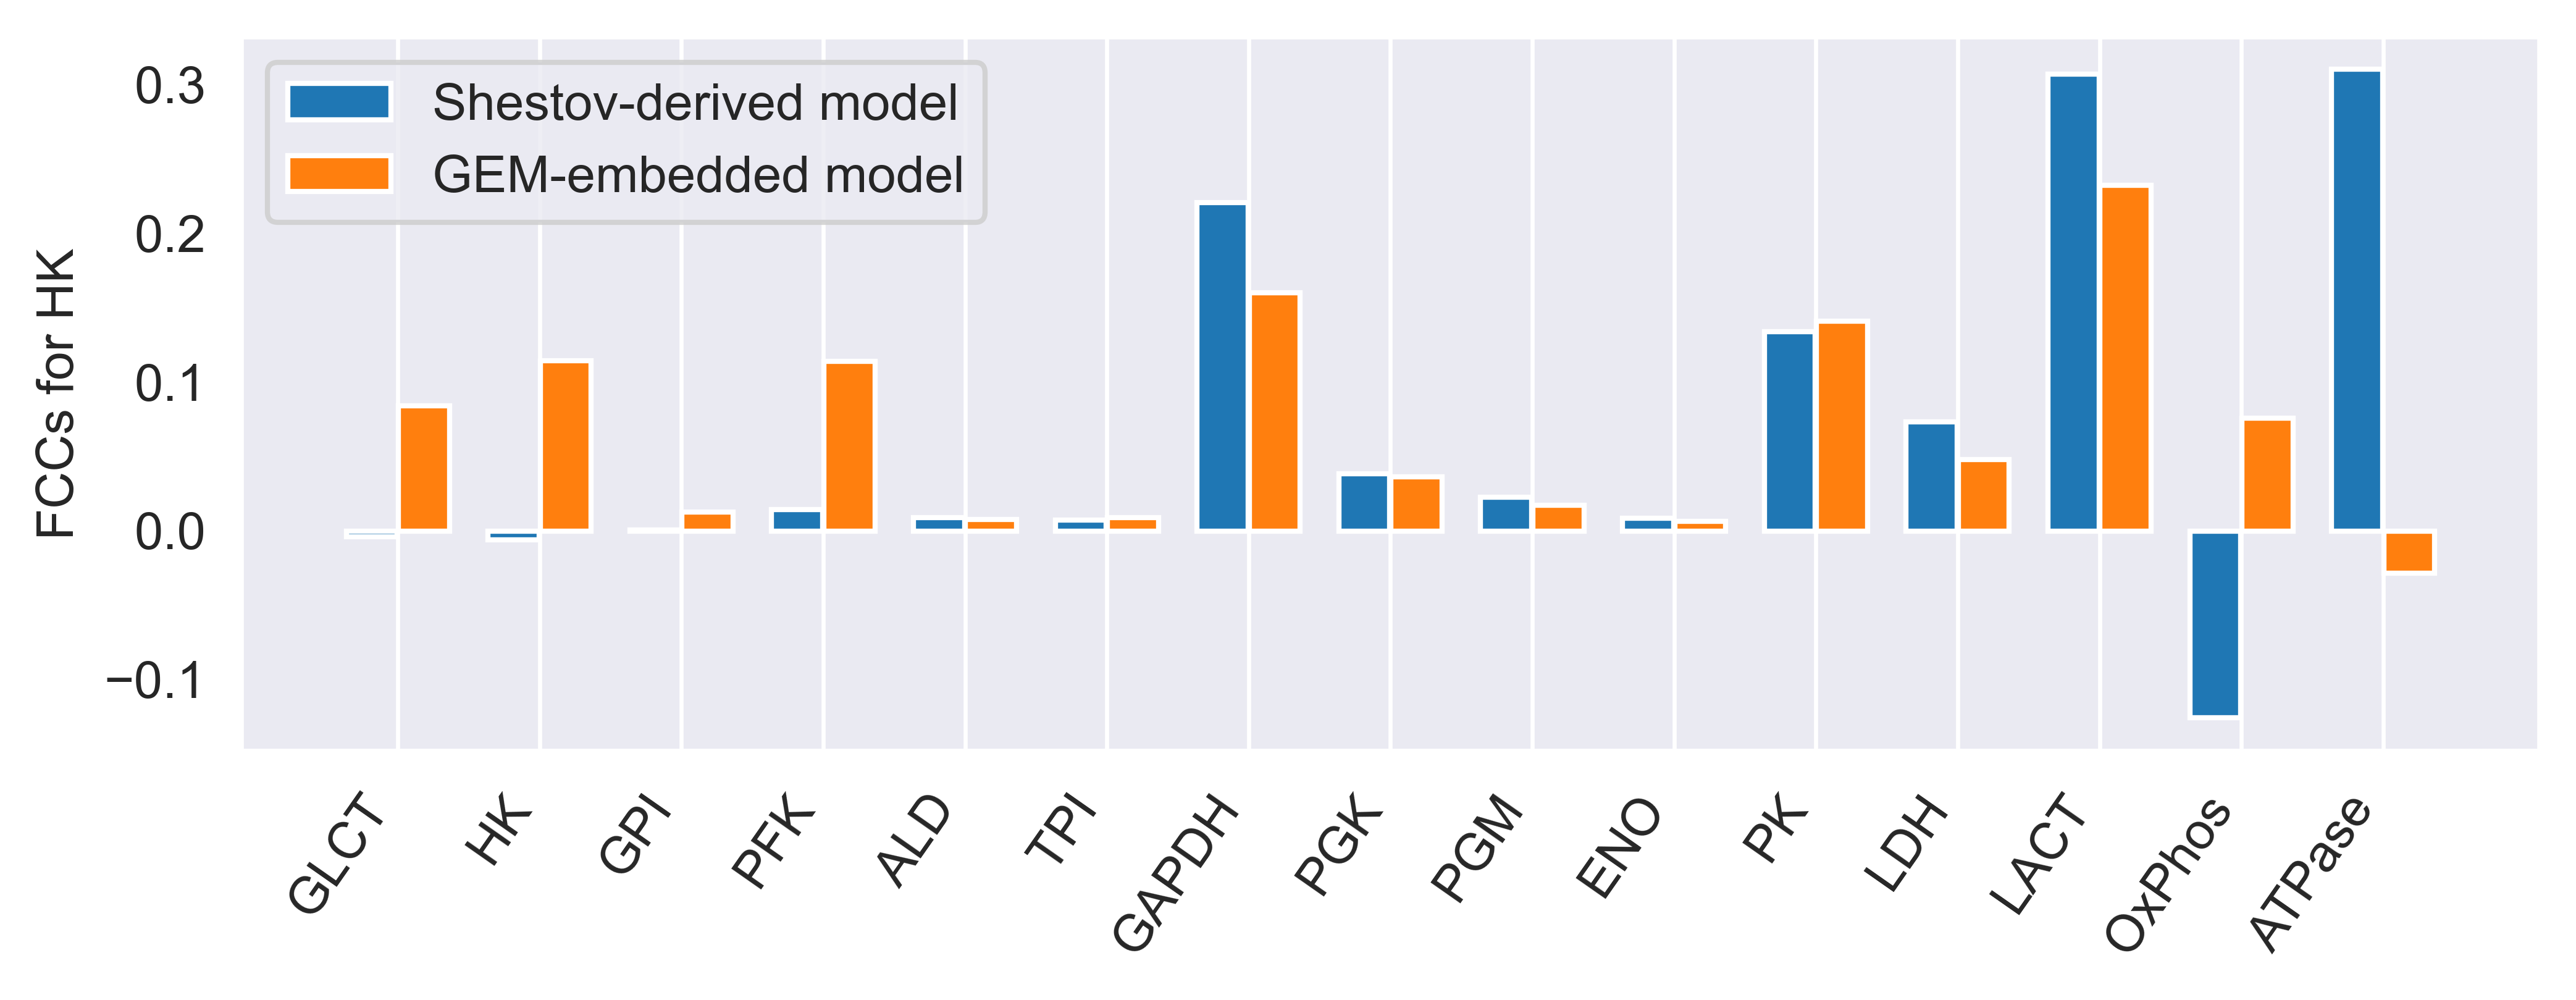

In [3]:
causes = fcc_Komkova.columns.drop(['AK', 'OXYT'])
plot_fcc_difference(fcc_Shestov, fcc_Komkova, 'HK', causes)

## Fig. S1 Differences in the flux control coefficients between the Shestov-derived model and the GEM-embedded model (for LACT, OxPhos, and ATPase flux).



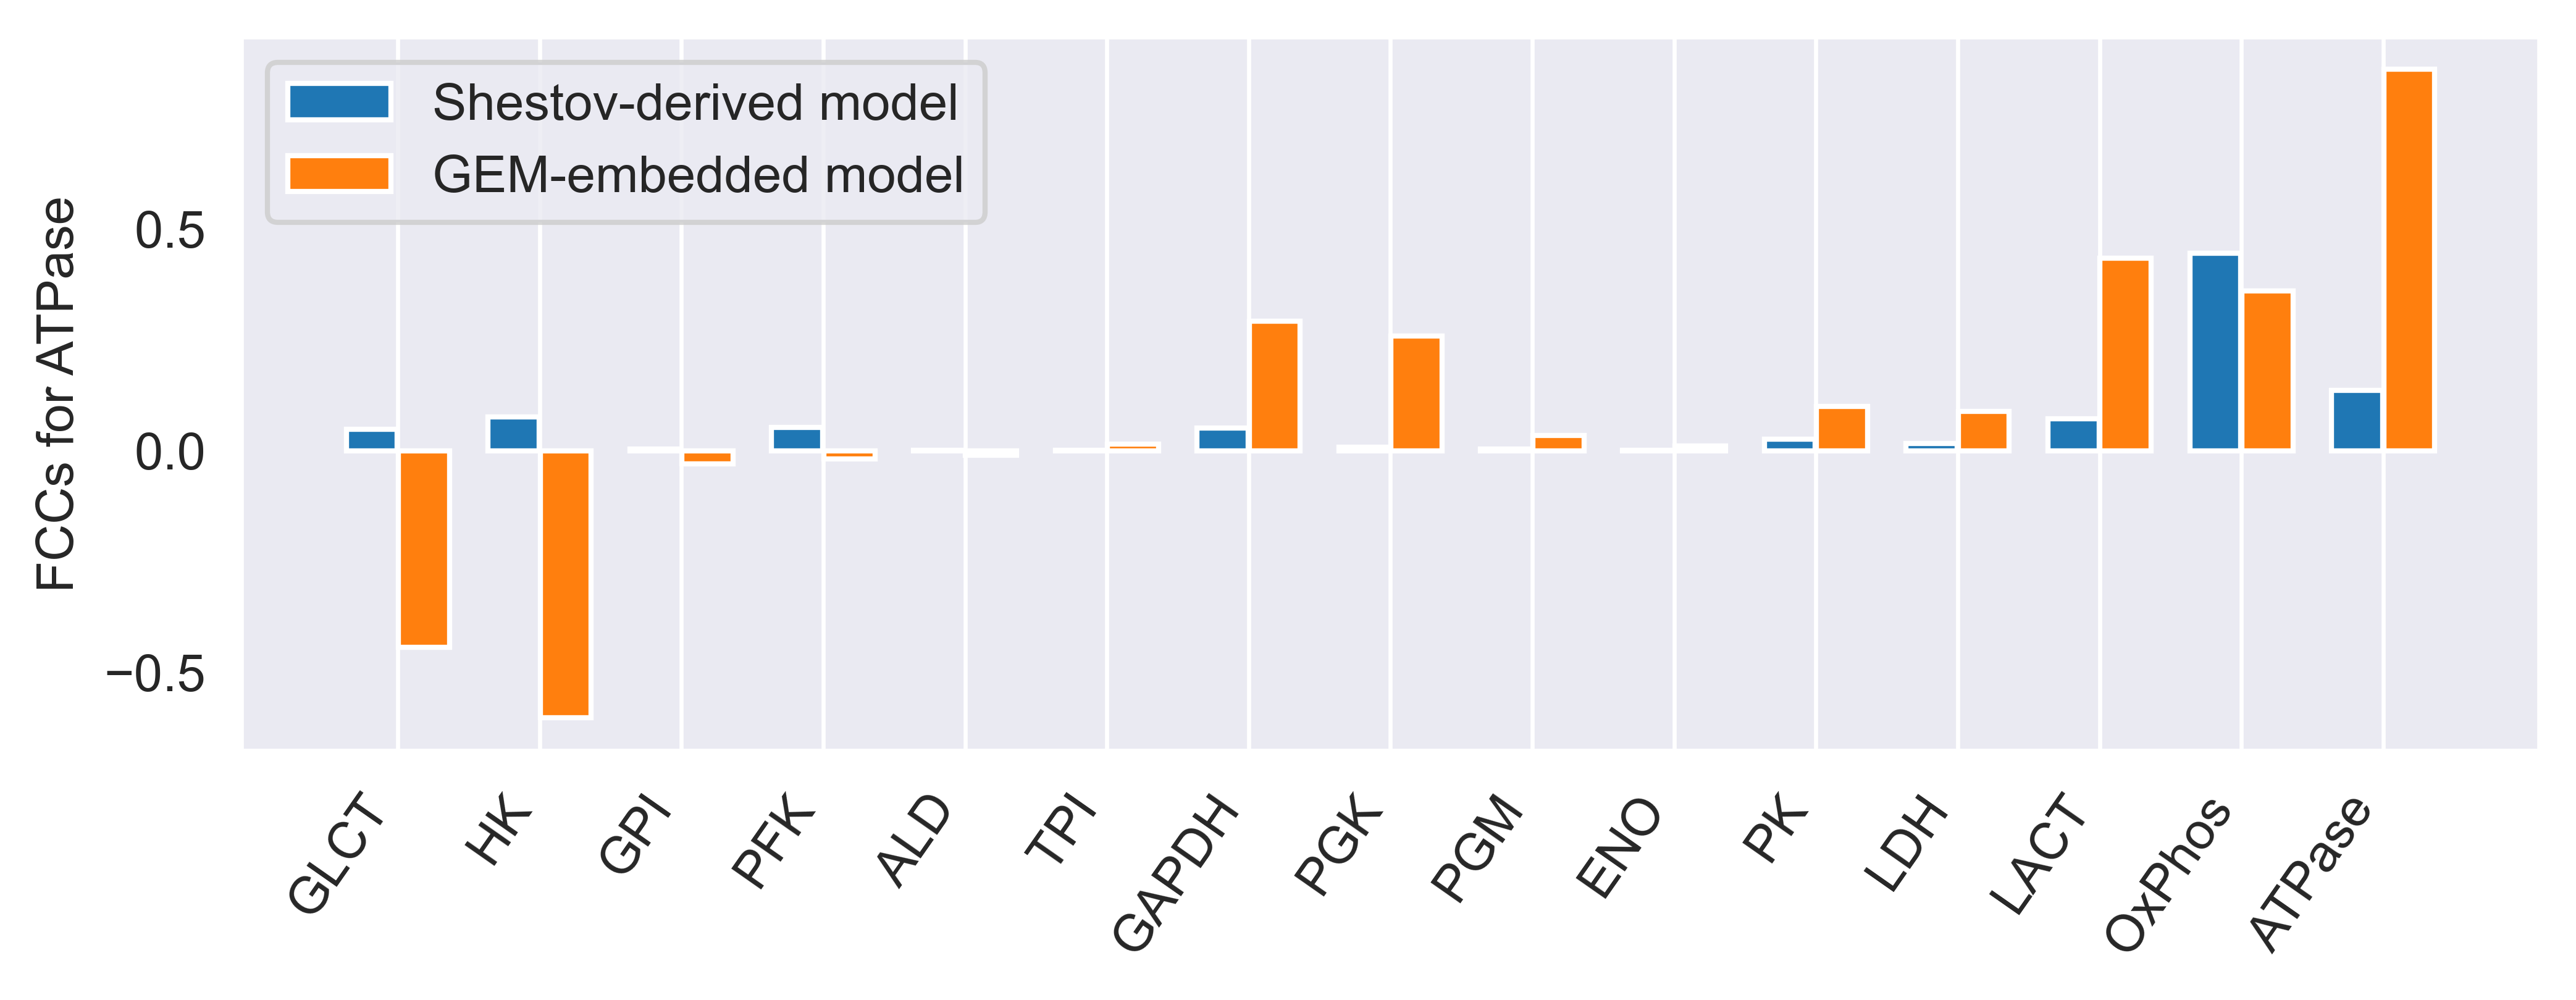

In [4]:
plot_fcc_difference(fcc_Shestov, fcc_Komkova, 'ATPase', causes)

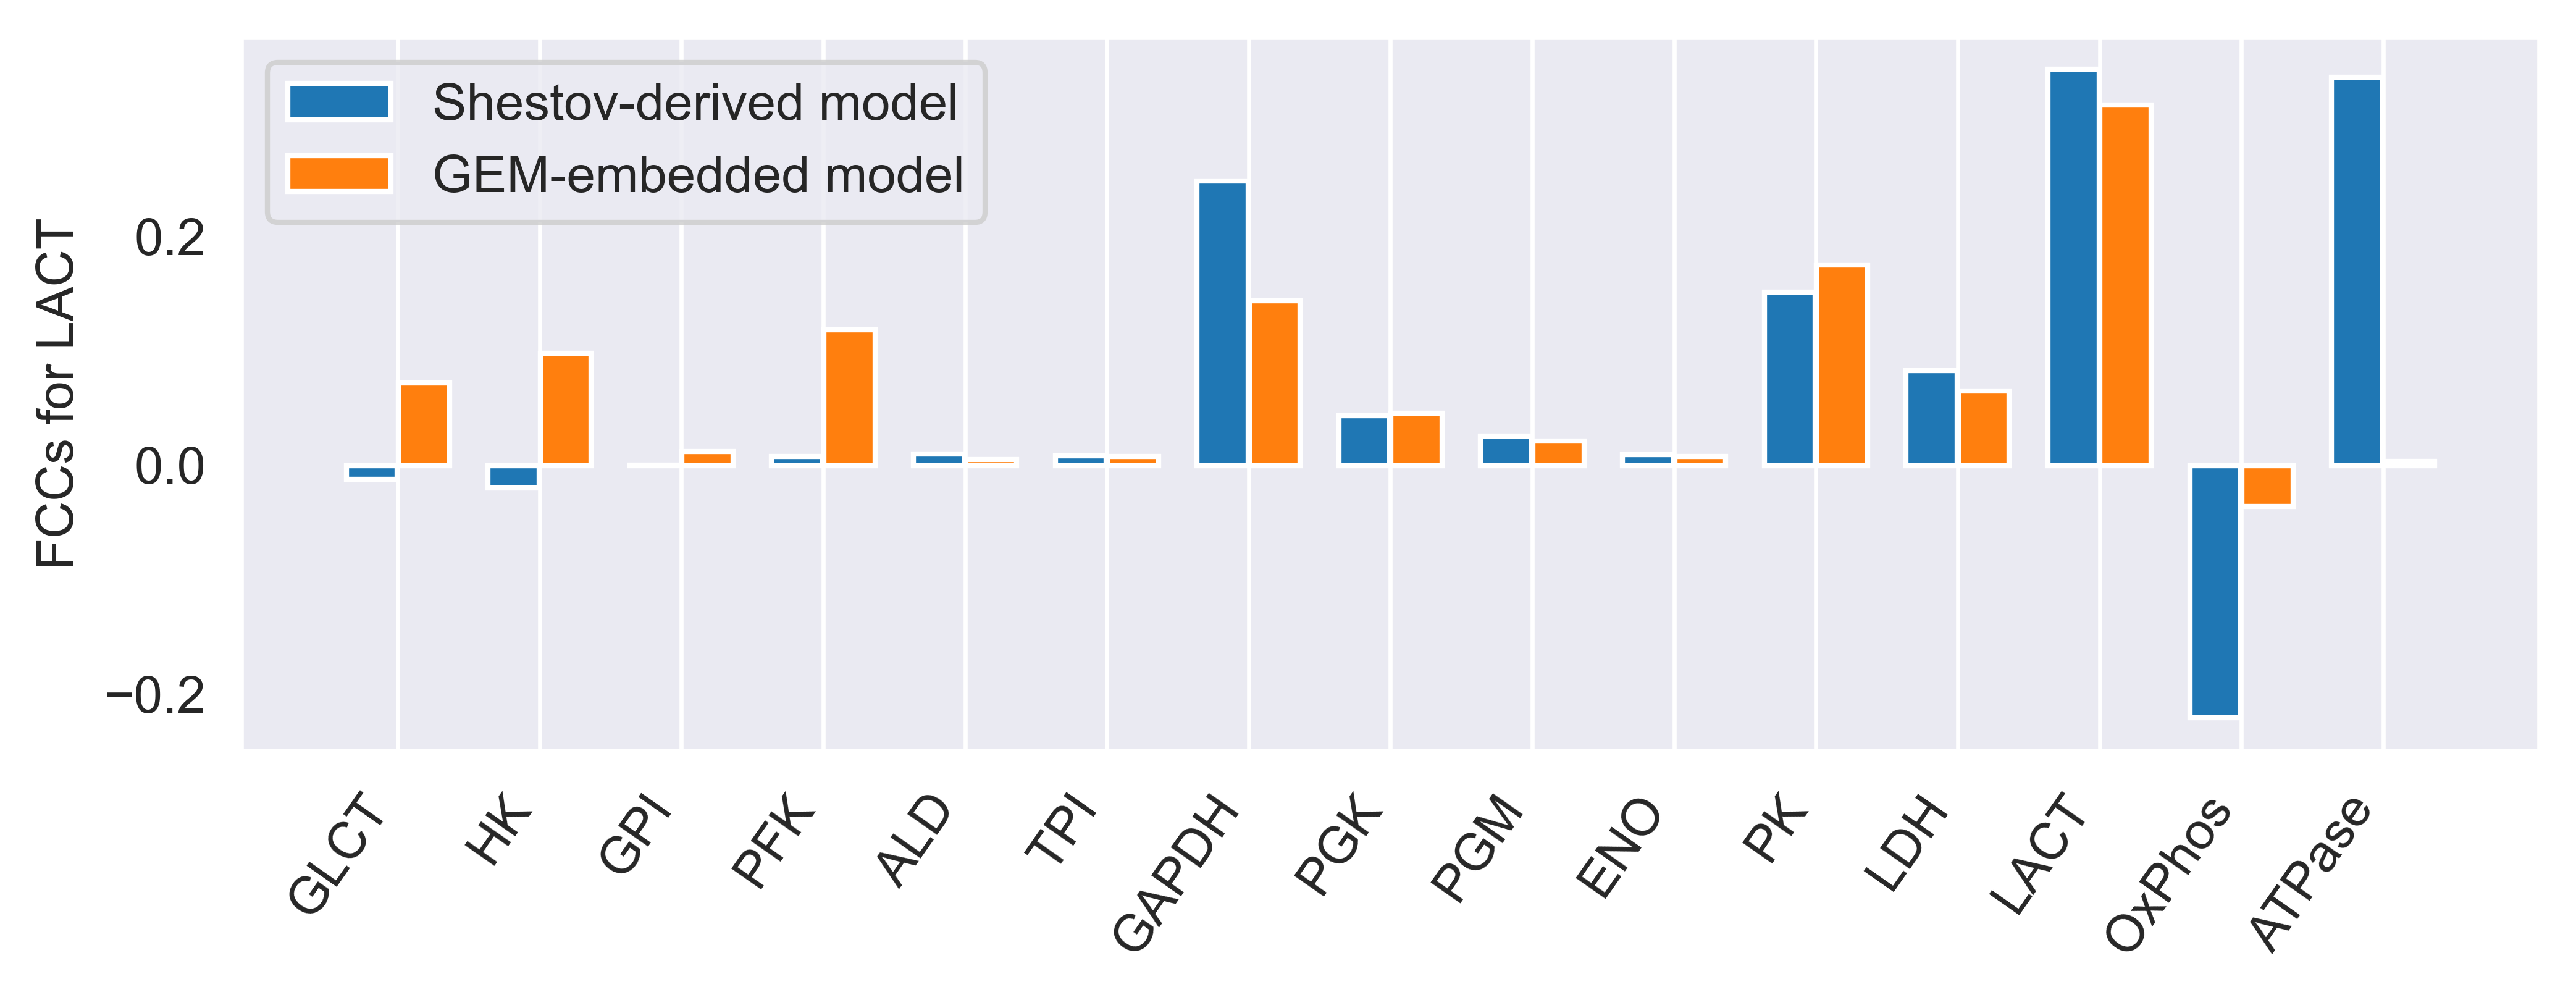

In [5]:
plot_fcc_difference(fcc_Shestov, fcc_Komkova, 'LACT', causes)


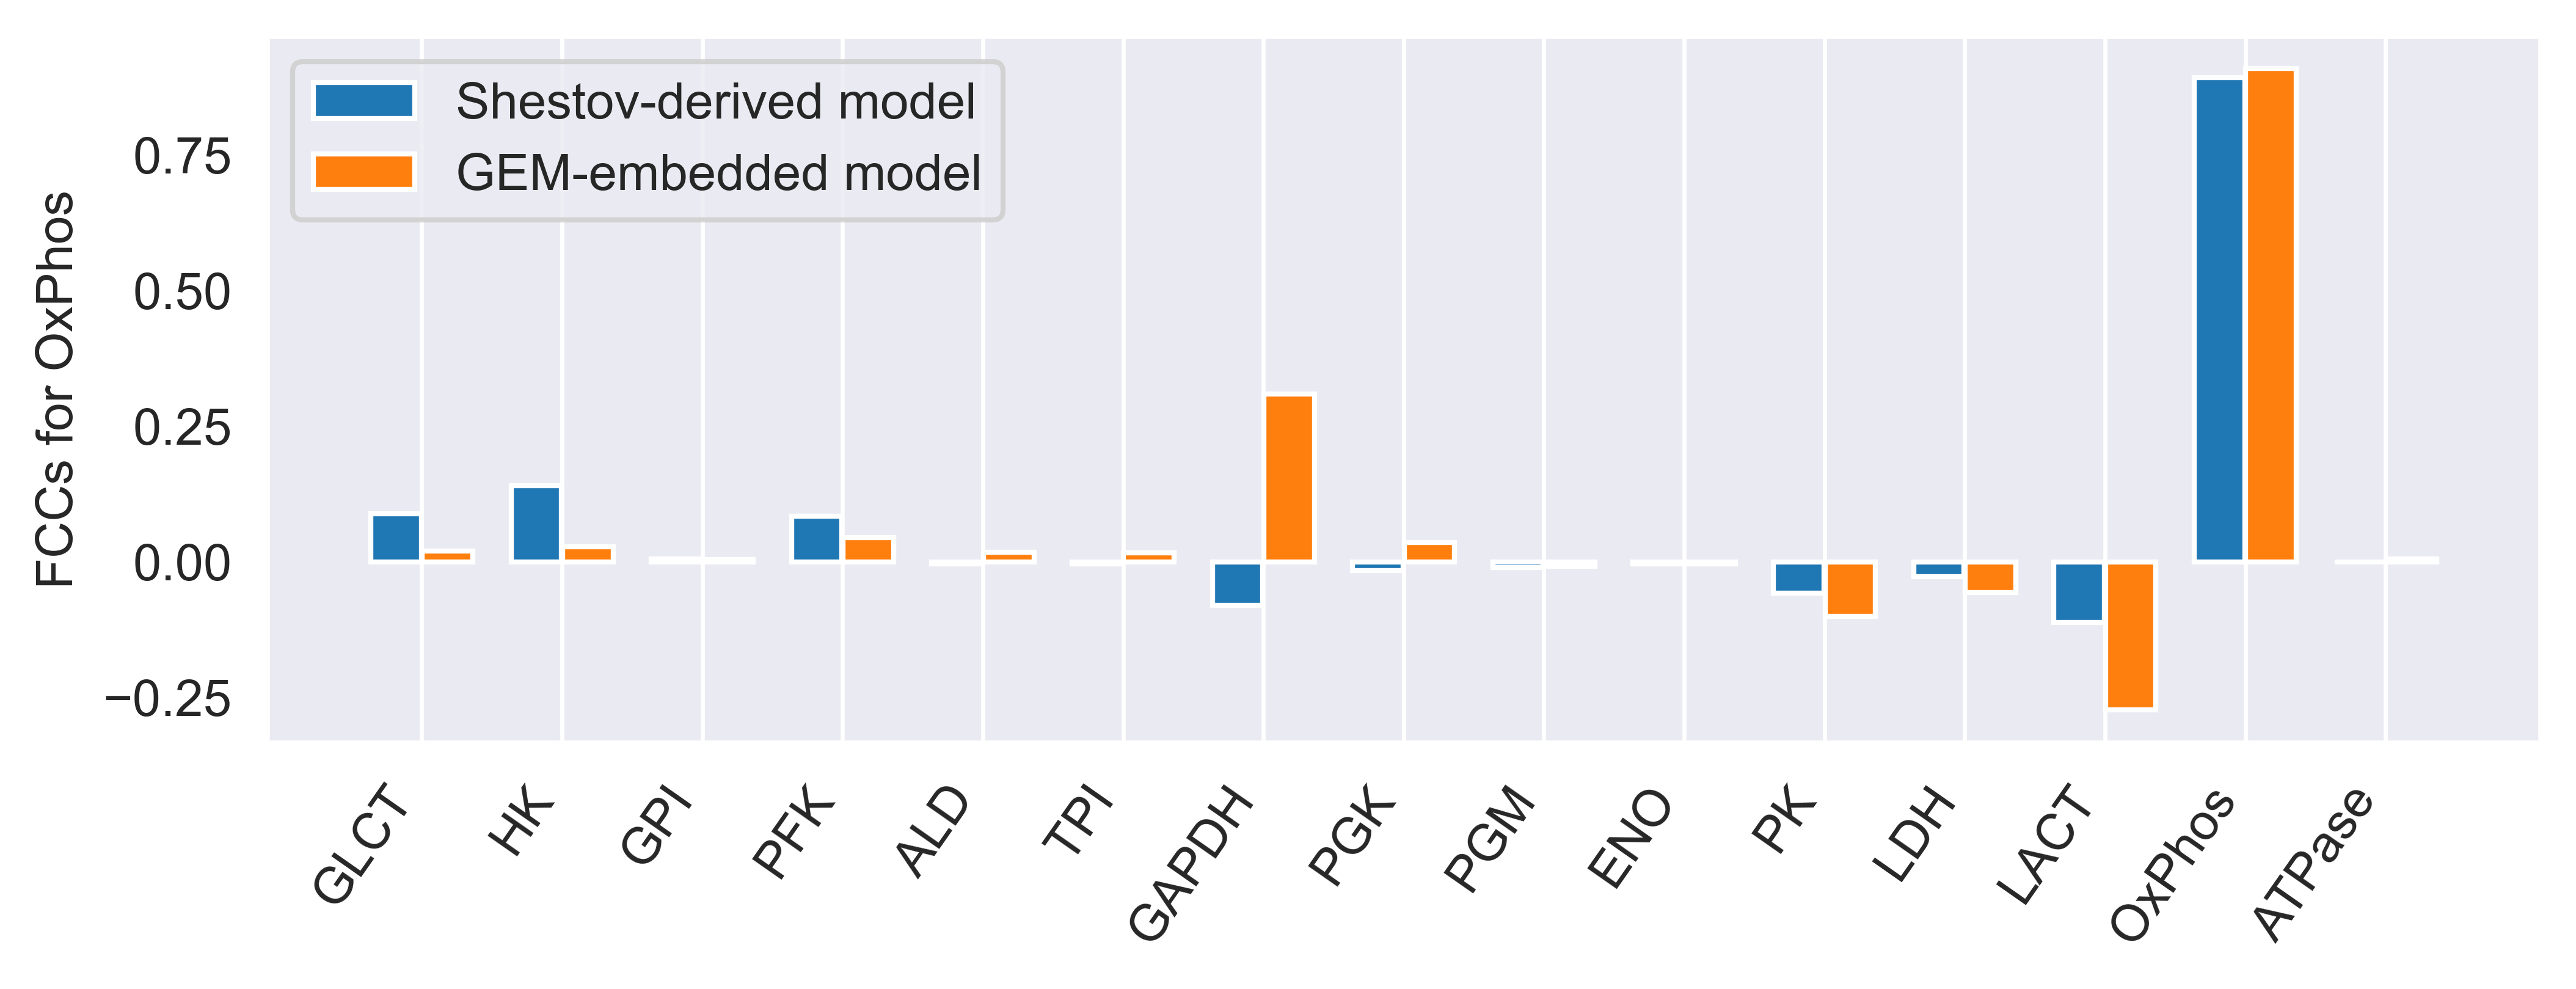

In [6]:
plot_fcc_difference(fcc_Shestov, fcc_Komkova, 'OxPhos', causes)


## Fig. S2 Flux control coefficients of growth rate in the GEM-embedded model.


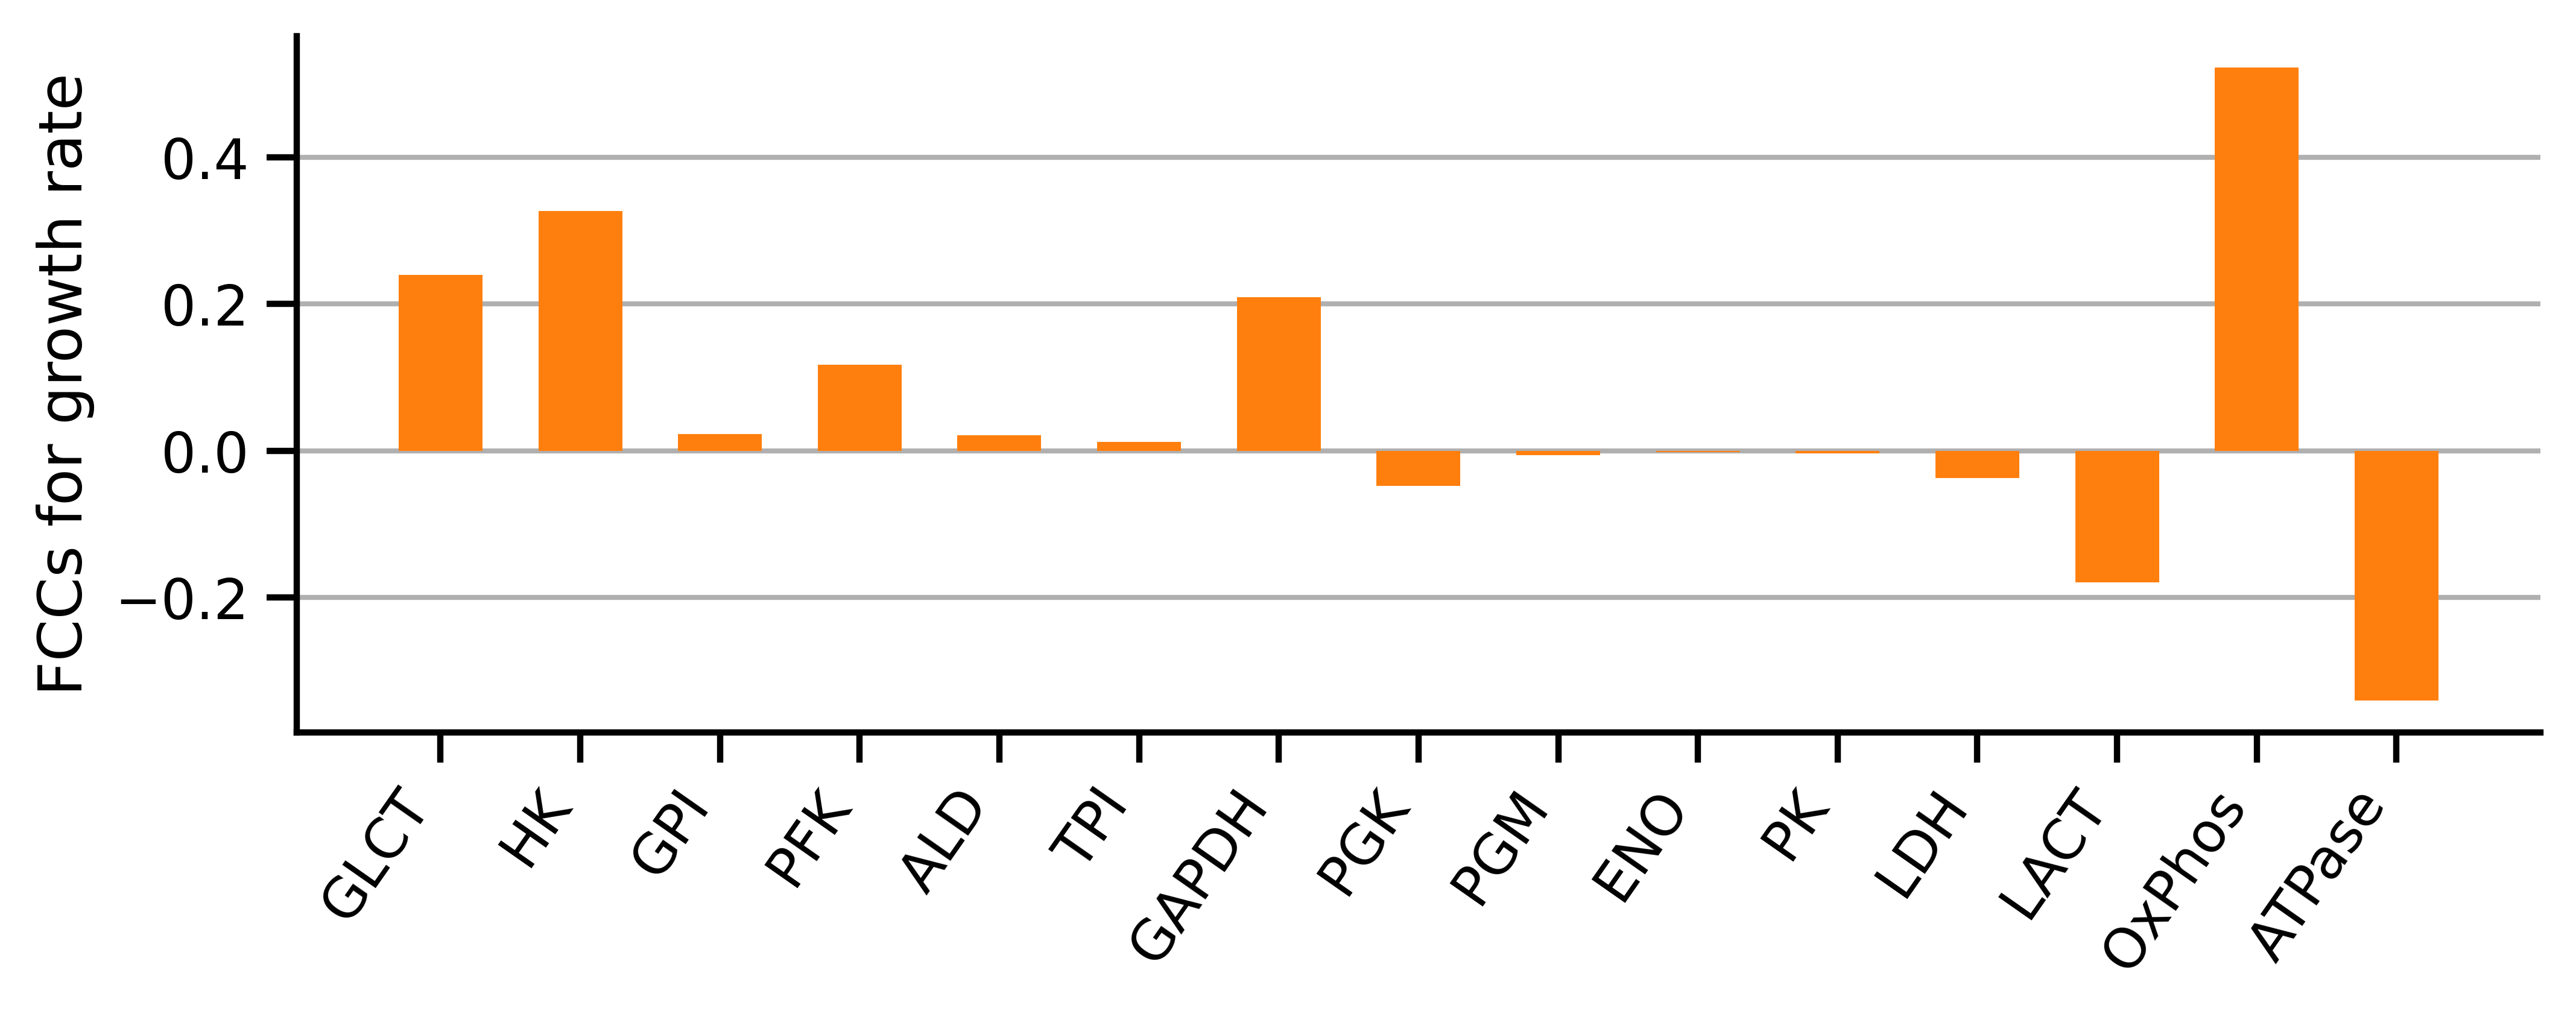

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

plt.rcParams["font.size"] = 10
sns.set_context('notebook')

plt.figure(figsize=(8, 2.5), dpi=600)
plt.grid(axis='y')

ticks = list(causes)
bar_count = len(ticks)

step = 2
bar_width = 1.2

x = np.arange(start=0, stop=bar_count * step, step=step)
plt.bar(x, fcc_Komkova.loc['Growth', causes], width=bar_width, color='#ff7f0e', zorder=3)
plt.xticks(x, ticks, rotation=55, ha='right')

plt.ylabel('FCCs for growth rate')
plt.locator_params(axis='y', nbins=8)

path = '../../out/FCC_growth.png'
plt.savefig(path, bbox_inches='tight', transparent=True)

plt.show()
